In [2]:
import pandas as pd

In [10]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

Importing data

In [4]:
data = pd.read_csv('london_houses.csv')

In [5]:
data.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

In [40]:
data.describe()

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,Price (£)
count,1000.000000,1000.000000,1000.0000,1000.00000,1000.000000,1.000000e+03
mean,3.013000,2.003000,149.6270,49.96500,1.991000,1.840807e+06
std,1.393834,0.808483,58.0562,29.07086,0.821946,8.793484e+05
min,1.000000,1.000000,50.0000,1.00000,1.000000,3.866660e+05
25%,2.000000,1.000000,99.0000,24.00000,1.000000,1.161400e+06
50%,3.000000,2.000000,148.0000,50.00000,2.000000,1.721999e+06
75%,4.000000,3.000000,201.0000,76.00000,3.000000,2.390500e+06
max,5.000000,3.000000,249.0000,99.00000,3.000000,4.980000e+06


In [8]:
# First replace the address with the street name only
data['Address'] = data['Address'].str.replace(r'^\d+\s', '', regex=True)
data['Address']

0           Regent Street
1           Oxford Street
2           Regent Street
3       Piccadilly Circus
4            Fleet Street
              ...        
995    Camden High Street
996             Park Lane
997    Camden High Street
998             Park Lane
999          Baker Street
Name: Address, Length: 1000, dtype: object

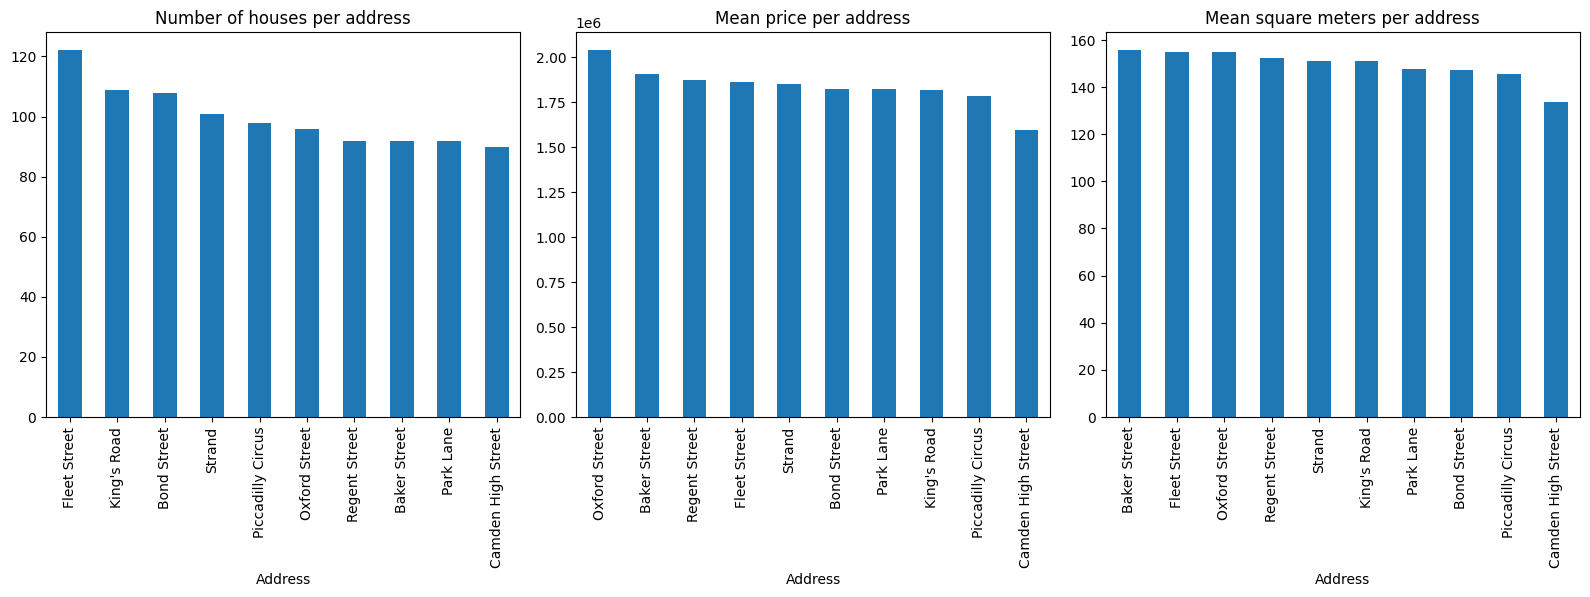

In [9]:
f, ax = plt.subplots(1,3, figsize=(16, 6))


data['Address'].value_counts().plot(kind='bar', ax = ax[0])   

data_mean_price_address = data['Price (£)'].groupby(data['Address']).mean().sort_values(ascending=False)
data_mean_price_address.plot(kind='bar', ax=ax[1])

data_mean_square_address = data['Square Meters'].groupby(data['Address']).mean().sort_values(ascending=False)
data_mean_square_address.plot(kind='bar', ax=ax[2])

plt.tight_layout()
ax[0].set_title('Number of houses per address')
ax[1].set_title('Mean price per address')
ax[2].set_title('Mean square meters per address')
plt.show()

In [11]:
data['price per square meter'] = data['Price (£)'] / data['Square Meters']

In [13]:
data[data['price per square meter'] == data['price per square meter'].max()]

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£),price per square meter
77,Camden High Street,Chelsea,4,3,128,72,No,No,1,Detached House,Underfloor Heating,High-level Balcony,Industrial,Park,Granite,Renovated,2560000,20000.0
83,Piccadilly Circus,Chelsea,3,2,94,47,Yes,Yes,1,Detached House,Central Heating,No Balcony,Minimalist,Garden,Granite,Renovated,1880000,20000.0
86,Oxford Street,Chelsea,5,2,249,3,Yes,No,2,Detached House,Central Heating,High-level Balcony,Minimalist,Sea,Wood,Renovated,4980000,20000.0
102,Camden High Street,Chelsea,1,1,153,54,No,Yes,1,Detached House,Central Heating,High-level Balcony,Modern,Park,Granite,Old,3060000,20000.0
113,Park Lane,Chelsea,3,1,188,52,No,No,3,Detached House,Underfloor Heating,No Balcony,Minimalist,Sea,Wood,Old,3760000,20000.0
238,Park Lane,Chelsea,1,2,163,85,No,Yes,1,Detached House,Electric Heating,Low-level Balcony,Modern,Garden,Wood,New,3260000,20000.0
291,Fleet Street,Chelsea,2,1,196,96,Yes,No,2,Detached House,Underfloor Heating,Low-level Balcony,Modern,Park,Wood,Renovated,3920000,20000.0
306,Strand,Chelsea,4,1,109,30,Yes,Yes,1,Detached House,Electric Heating,No Balcony,Minimalist,Street,Laminate Flooring,New,2180000,20000.0
307,Baker Street,Chelsea,3,3,88,4,Yes,Yes,2,Detached House,Underfloor Heating,Low-level Balcony,Classic,Sea,Laminate Flooring,Old,1760000,20000.0
324,Strand,Chelsea,3,1,114,69,Yes,Yes,2,Detached House,Gas Heating,No Balcony,Industrial,Park,Marble,Renovated,2280000,20000.0


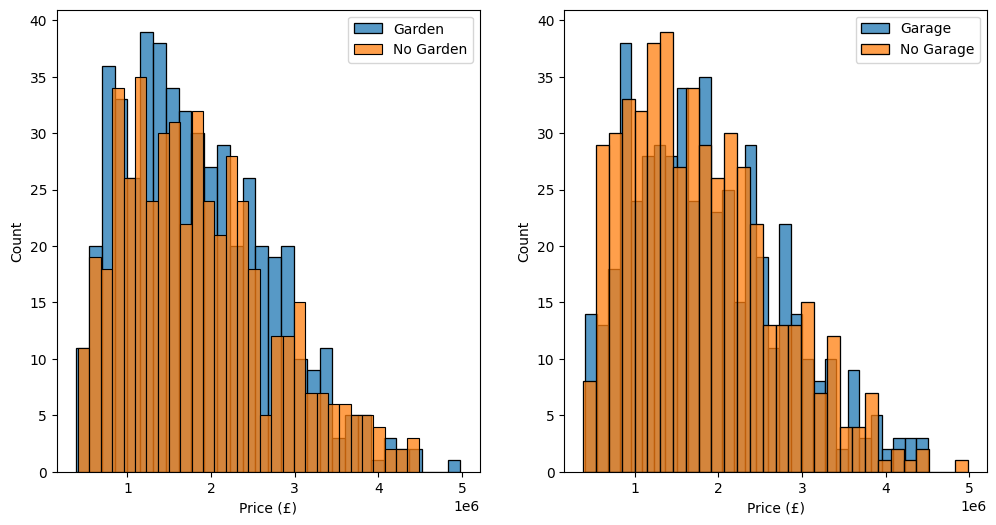

In [14]:
#Histogram of garden and garage
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data[data['Garden'] == 'Yes']['Price (£)'], bins=30, ax=ax[0], label='Garden')
sns.histplot(data[data['Garden'] == 'No']['Price (£)'], bins=30, ax=ax[0], label='No Garden')
ax[0].legend()

sns.histplot(data[data['Garage'] == 'Yes']['Price (£)'], bins=30, ax=ax[1], label='Garage')
sns.histplot(data[data['Garage'] == 'No']['Price (£)'], bins=30, ax=ax[1], label='No Garage')
ax[1].legend()

plt.show()

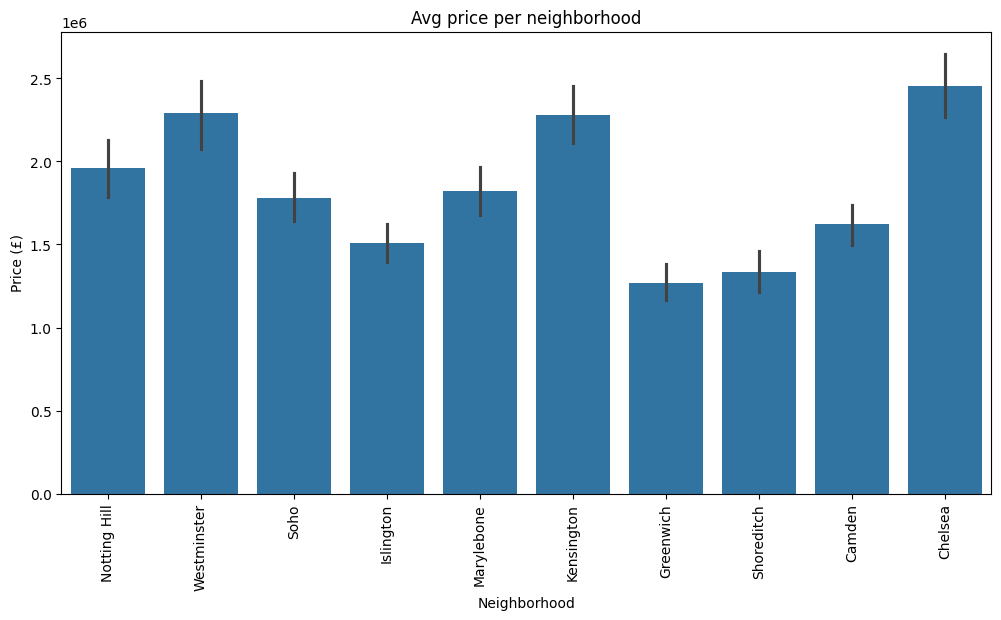

In [15]:
#Neighborhood vs price
plt.figure(figsize=(12, 6))
sns.barplot(x='Neighborhood', y='Price (£)', data=data)
plt.xticks(rotation=90)
plt.title('Avg price per neighborhood')
plt.show()

C:\Users\thaku\AppData\Local\Temp\ipykernel_20056\4029354340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Property Type', y='Square Meters', palette='Set2')


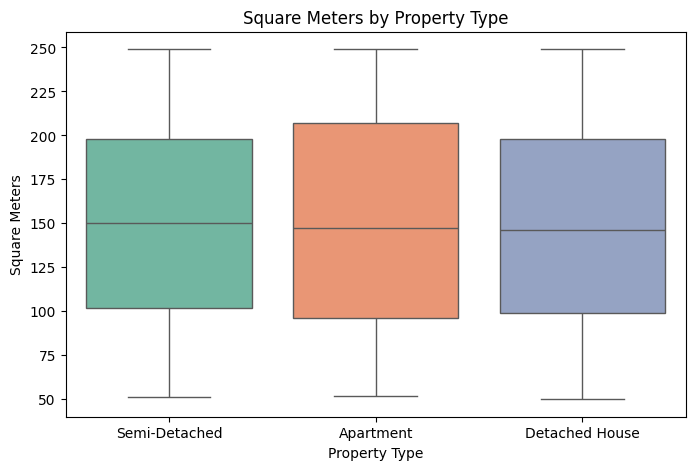

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Property Type', y='Square Meters', palette='Set2')
plt.title('Square Meters by Property Type')
plt.show()

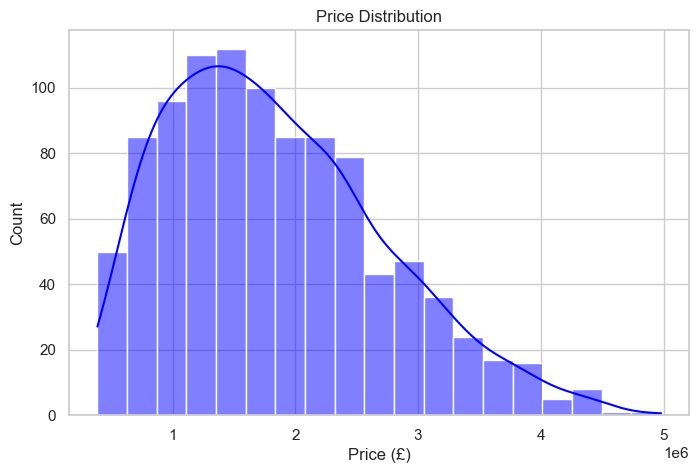

In [17]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(data['Price (£)'], kde=True, color='blue')
plt.title('Price Distribution')
plt.show()

C:\Users\thaku\AppData\Local\Temp\ipykernel_20056\1475702363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Bedrooms', y='Price (£)', palette='Set2')


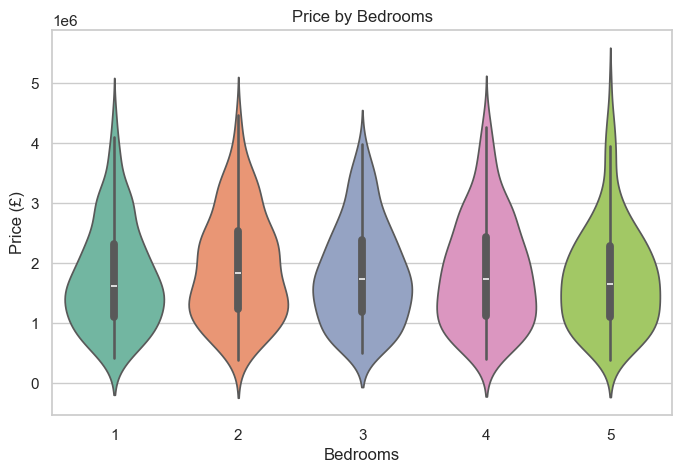

In [18]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=data, x='Bedrooms', y='Price (£)', palette='Set2')
plt.title('Price by Bedrooms')
plt.show()

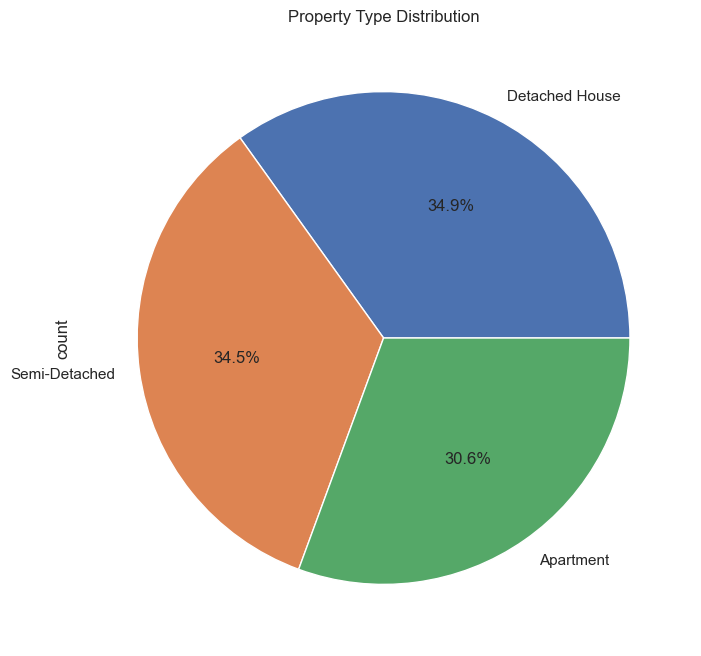

In [19]:
#property type distribution
plt.figure(figsize=(8, 8))
data['Property Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Property Type Distribution')
plt.show()

C:\Users\thaku\AppData\Local\Temp\ipykernel_20056\3726342267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = data, x='Heating Type', y='Price (£)', palette='Set2')


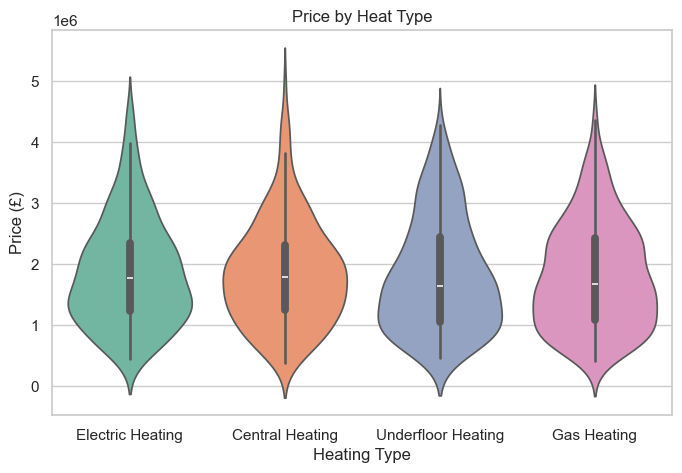

In [21]:
plt.figure(figsize=(8, 5))
sns.violinplot(data = data, x='Heating Type', y='Price (£)', palette='Set2')
plt.title('Price by Heat Type')
plt.show()

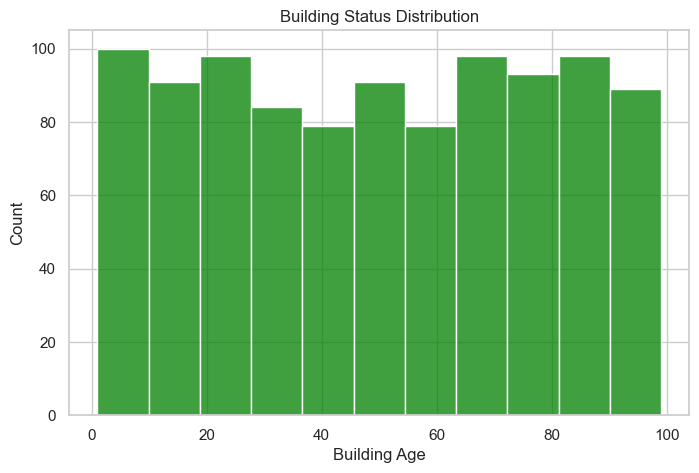

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Building Age'], color='green')
plt.title('Building Status Distribution')
plt.show()

C:\Users\thaku\AppData\Local\Temp\ipykernel_20056\132924723.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Balcony', y='Price (£)', data=data, ci=None, palette='Set2')
C:\Users\thaku\AppData\Local\Temp\ipykernel_20056\132924723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Balcony', y='Price (£)', data=data, ci=None, palette='Set2')


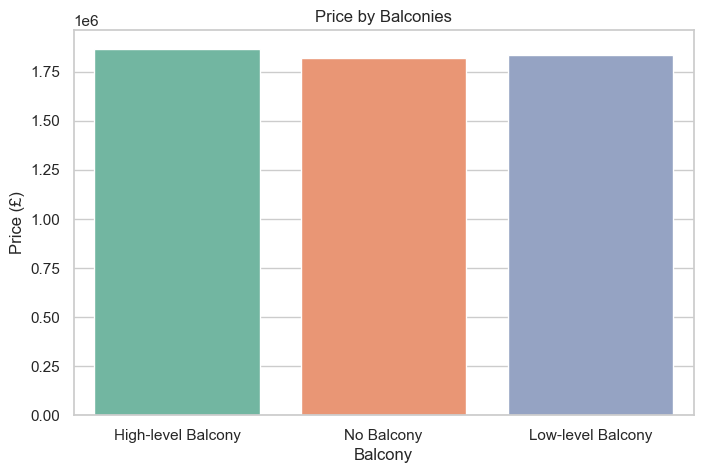

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Balcony', y='Price (£)', data=data, ci=None, palette='Set2')
plt.title('Price by Balconies')
plt.show()

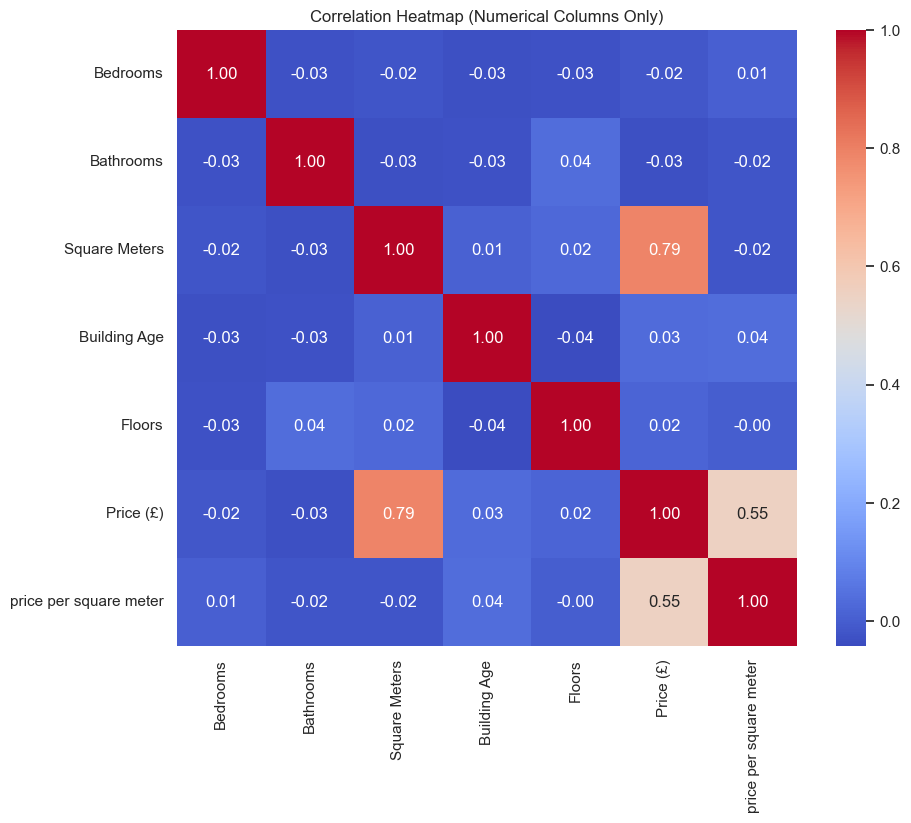

In [30]:
plt.figure(figsize=(10, 8))
numerical_columns = data.select_dtypes(include=['number']).columns
corr = data[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Columns Only)')
plt.show()

In [31]:
data.replace({
    'Neighborhood':{'Camden': 0, 'Chelsea': 1, 'Greenwich': 2, 'Islington': 3, 'Kensington': 4, 'Marylebone': 5, 'Notting Hill': 6, 'Shoreditch': 7, 'Soho': 8, 'Westminster': 9},
    'Garden': {'No': 0, 'Yes': 1},
    'Garage': {'No': 0, 'Yes': 1},
    'Property Type': {'Apartment': 0, 'Detached House': 1, 'Semi-Detached': 2},
    'Heating Type': {'Gas Heating': 0, 'Electric Heating': 1, 'Central Heating': 2, 'Underfloor Heating': 3},
    'Balcony': {'High-level Balcony': 0, 'Low-level Balcony': 1, 'No Balcony': 2},
    'Interior Style': {'Industrial': 0, 'Classic': 1, 'Minimalist': 2, 'Modern': 3},
    'View': {'Garden': 0, 'City': 1, 'Street': 2, 'Park': 3, 'Sea': 4},
    'Materials': {'Marble': 0, 'Laminate Flooring': 1, 'Wood': 2, 'Granite': 3, 'Glass': 4},
    'Building Status': {'Renovated': 0, 'Old': 1, 'New': 2}
}, inplace=True)


C:\Users\thaku\AppData\Local\Temp\ipykernel_20056\2162200602.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({


In [32]:
data.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£),price per square meter
0,Regent Street,6,2,3,179,72,0,0,3,2,1,0,0,0,0,0,2291200,12800.0
1,Oxford Street,9,2,1,123,34,1,0,1,0,2,0,0,1,1,1,1476000,12000.0
2,Regent Street,8,5,3,168,38,0,1,3,2,2,2,0,2,2,0,1881600,11200.0
3,Piccadilly Circus,3,5,1,237,53,1,1,1,0,3,2,1,3,3,0,1896000,8000.0
4,Fleet Street,5,4,1,127,23,0,1,2,2,2,2,3,3,2,1,1524000,12000.0


In [33]:
X = data[['Neighborhood','Bedrooms', 'Bathrooms', 'Square Meters', 'Building Age', 'Garden', 'Garage', 'Floors', 'Property Type', 'Heating Type',	'Balcony', 'Interior Style', 'View','Materials', 'Building Status']]
y = data['Price (£)']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
model = SVR(kernel='linear')

In [36]:
model.fit(x_train, y_train)

SVR(kernel='linear')

In [37]:
y_pred = model.predict(x_test)

In [38]:
custom_data = np.array([[6,2,3,179,72,0,0,3,2,1,0,0,0,0,0]])
print(model.predict(custom_data))

[1988961.82229073]


c:\Users\thaku\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


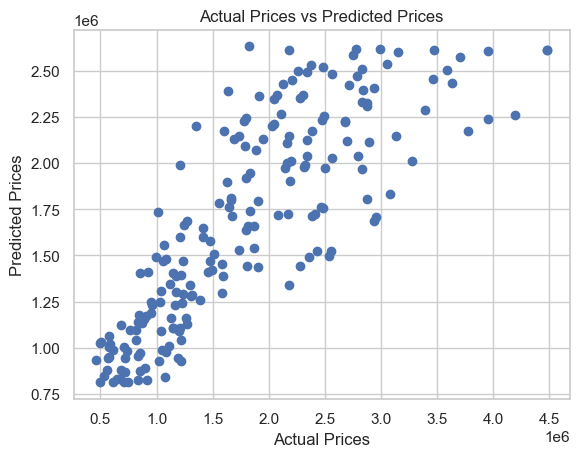

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [40]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
R2_score = r2_score(y_test, y_pred)
print('R2 Score:', R2_score)

Mean Squared Error: 298182815710.2372
R2 Score: 0.6276579299761842


Linear Regression 

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model1 = LinearRegression()

In [43]:
model1.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred1 = model1.predict(x_test)

In [45]:
custom_data = np.array([[6,2,3,179,72,0,0,3,2,1,0,0,0,0,0]])
print(model1.predict(custom_data))

[2341201.86628635]


c:\Users\thaku\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
mse = mean_squared_error(y_test, y_pred1)
print('Mean Squared Error:', mse)
R2_score = r2_score(y_test, y_pred1)
print('R2 Score:', R2_score)

Mean Squared Error: 240604939951.38327
R2 Score: 0.6995556528431486


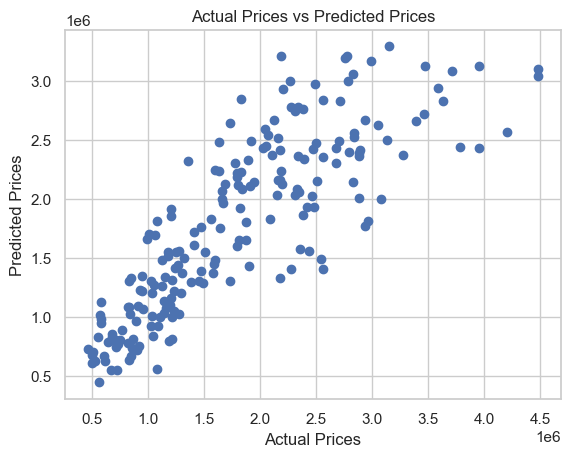

In [47]:
plt.scatter(y_test, y_pred1)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
model2 = RandomForestRegressor(n_estimators=100)

In [50]:
model2.fit(x_train, y_train)

RandomForestRegressor()

In [51]:
y_pred2 = model2.predict(x_test)

In [52]:
custom_data = np.array([[6,2,3,179,72,0,0,3,2,1,0,0,0,0,0]])
print(model2.predict(custom_data))

[2326135.91]


c:\Users\thaku\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [53]:
mse = mean_squared_error(y_test, y_pred2)
print('Mean Squared Error:', mse)
R2_score = r2_score(y_test, y_pred2)
print('R2 Score:', R2_score)

Mean Squared Error: 67782931075.08543
R2 Score: 0.9153591838997701


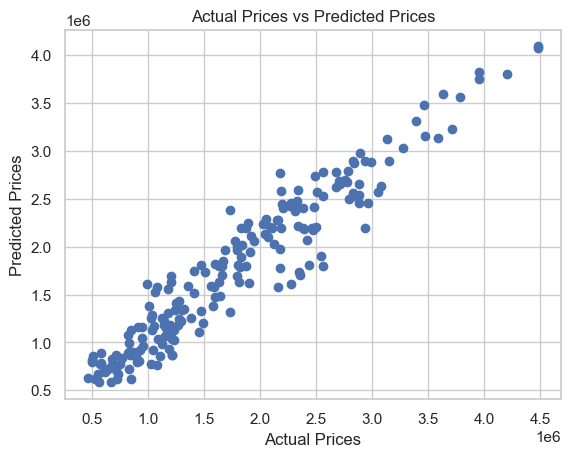

In [54]:
plt.scatter(y_test, y_pred2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Gradient Boosting Regressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
model3 = GradientBoostingRegressor(n_estimators=100)

In [57]:
model3.fit(x_train, y_train)

GradientBoostingRegressor()

In [58]:
y_pred3 = model3.predict(x_test)

In [59]:
custom_data = np.array([[6,2,3,179,72,0,0,3,2,1,0,0,0,0,0]])
print(model3.predict(custom_data))

[2225172.01147166]


c:\Users\thaku\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [60]:
mse = mean_squared_error(y_test, y_pred3)
print('Mean Squared Error:', mse)
R2_score = r2_score(y_test, y_pred3)
print('R2 Score:', R2_score)

Mean Squared Error: 14310030038.684746
R2 Score: 0.9821310084754025


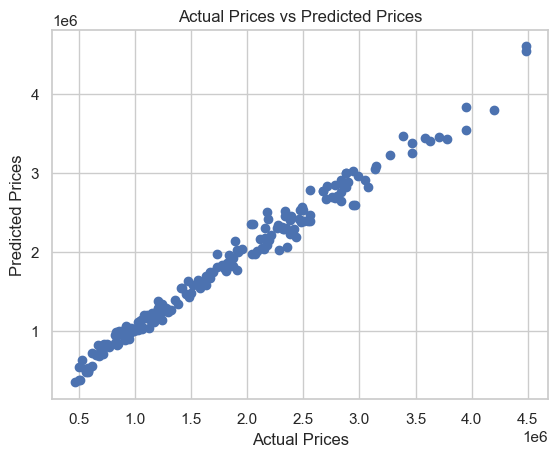

In [61]:
plt.scatter(y_test, y_pred3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

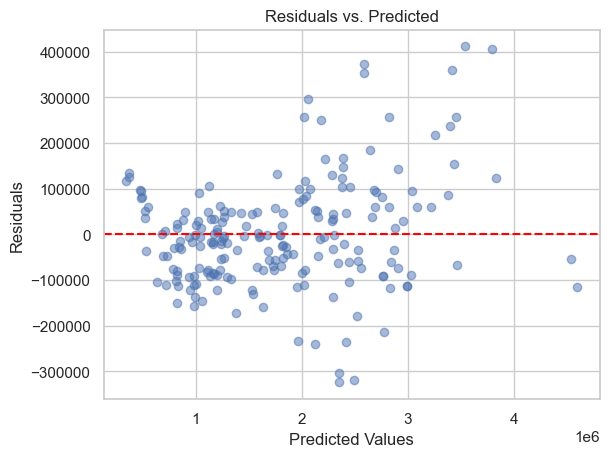

In [62]:
residuals = y_test - y_pred3

plt.scatter(y_pred3, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()

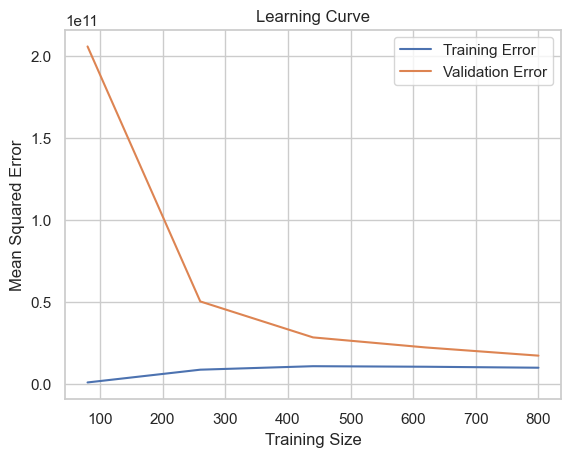

In [63]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model3, X, y, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Validation Error')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [64]:
import pickle

In [65]:
pickle.dump(model3, open('LondonHousePredictionmodel.pkl', 'wb'))